In [1]:
import pandas as pd

In [2]:
btc_prices = pd.read_csv('/Users/dimmehal/PycharmProjects/twitter_sentiment/data/btc_prices.csv')

In [83]:
import matplotlib.pyplot as plt
import datetime
import numpy as np

def create_plot(x, y):

    plt.plot(x,y)
    plt.show()

In [11]:
btc_prices['open_time'] =  pd.to_datetime(btc_prices['open_time'], format='%Y-%m-%d %H:%M:%S')

In [13]:
btc_prices_2 = btc_prices.resample('60min', on='open_time').mean()

In [24]:
btc_ts = btc_prices[(btc_prices['open_time'] > pd.to_datetime('2021-01-01')) & (btc_prices['open_time'] < '2021-09-30')]

In [34]:
btc_ts.reset_index().drop('index', axis=1)
btc_ts_2 = btc_ts.resample('D', on='open_time').mean()

In [35]:
btc_ts_2

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
open_time,,,,,,,,,
2021-01-01,29212.571619,29228.170313,29195.570709,29212.785094,37.634099,1.099189e+06,912.868659,19.068120,5.571663e+05
2021-01-02,30693.657375,30725.315458,30660.577542,30695.574403,90.273523,2.829057e+06,1559.668056,46.837712,1.465510e+06
2021-01-03,33448.355861,33489.457715,33405.464875,33448.991854,83.998310,2.817777e+06,1645.623611,41.493287,1.391964e+06
2021-01-04,31826.882174,31878.486146,31773.153313,31826.140382,97.847143,3.075702e+06,1835.005556,47.978104,1.509330e+06
2021-01-05,32221.226271,32265.342014,32173.387312,32222.474715,80.590276,2.599734e+06,1754.757639,41.452607,1.338330e+06
...,...,...,...,...,...,...,...,...,...
2021-08-02,39594.759083,39620.121597,39569.420153,39594.309569,35.303717,1.396478e+06,807.554167,17.054170,6.747199e+05
2021-08-03,38458.423625,38485.076951,38429.969181,38457.838653,39.664886,1.524556e+06,958.243750,19.224630,7.389714e+05
2021-08-04,38715.622382,38738.105187,38694.211062,38716.727368,36.336994,1.408777e+06,847.559722,18.613852,7.217619e+05


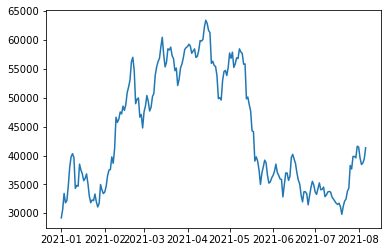

In [38]:
create_plot(btc_ts_2.index, btc_ts_2.open)

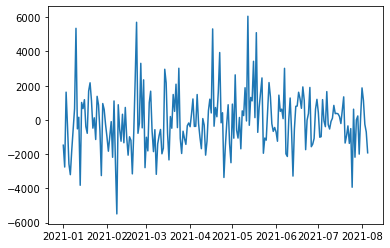

In [42]:
btc_ts_2['delta'] = btc_ts_2['open'] - btc_ts_2['open'].shift(-1)
create_plot(btc_ts_2.index, btc_ts_2.delta)

In [48]:
btc_ts_2['rw_avg'] = btc_ts_2['open'].rolling(window=5).mean()

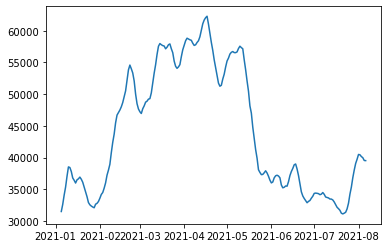

In [49]:
create_plot(btc_ts_2.index, btc_ts_2.rw_avg)

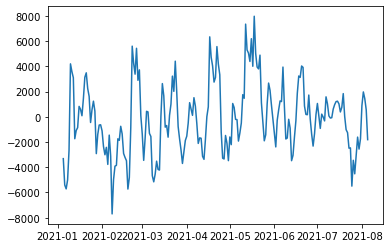

In [50]:
btc_ts_2['delta'] = btc_ts_2['rw_avg'] - btc_ts_2['open'].shift(-1)
create_plot(btc_ts_2.index, btc_ts_2.delta)

In [51]:
from tsfresh.utilities.dataframe_functions import impute

In [77]:
ts = btc_ts_2.reset_index()
ts['id'] = ts.index
ts = ts[['id', 'rw_avg', 'open_time']]

In [76]:
features_filtered_direct.columns

Index(['open__variance_larger_than_standard_deviation',
       'open__has_duplicate_max', 'open__has_duplicate_min',
       'open__has_duplicate', 'open__sum_values', 'open__abs_energy',
       'open__mean_abs_change', 'open__mean_change',
       'open__mean_second_derivative_central', 'open__median',
       ...
       'open__permutation_entropy__dimension_5__tau_1',
       'open__permutation_entropy__dimension_6__tau_1',
       'open__permutation_entropy__dimension_7__tau_1',
       'open__query_similarity_count__query_None__threshold_0.0',
       'open__matrix_profile__feature_"min"__threshold_0.98',
       'open__matrix_profile__feature_"max"__threshold_0.98',
       'open__matrix_profile__feature_"mean"__threshold_0.98',
       'open__matrix_profile__feature_"median"__threshold_0.98',
       'open__matrix_profile__feature_"25"__threshold_0.98',
       'open__matrix_profile__feature_"75"__threshold_0.98'],
      dtype='object', length=787)

In [82]:
from scipy.signal import argrelextrema
import numpy as np
n = 5

ts['min'] = ts.iloc[argrelextrema(ts.rw_avg.values, np.less_equal,
                    order=n)[0]]['rw_avg']
ts['max'] = ts.iloc[argrelextrema(ts.rw_avg.values, np.greater_equal,
                    order=n)[0]]['rw_avg']

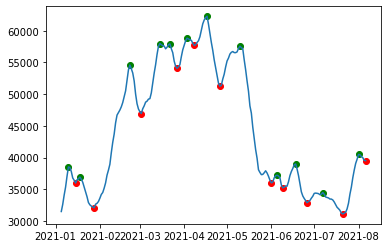

In [86]:
plt.scatter(ts.open_time, ts['min'], c='r')
plt.scatter(ts.open_time, ts['max'], c='g')

create_plot(ts.open_time, ts.rw_avg)